# SciPy

Zawiera m.in.:\
    całkowani,e\
    równania różniczkowe,\
    statystykę,\
    interpolację,\
    optymalizację,\
    przetwarzanie sygnałów

In [1]:
from matplotlib.pyplot import scatter
from win32file import TF_REUSE_SOCKET
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -------------------- ------------------- 19.9/38.5 MB 114.3 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 135.3 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 84.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats, spatial, fft, signal, linalg, ndimage, interpolate

## Całkowanie i różniczkowanie

In [3]:
res, err = integrate.quad(lambda x: x ** 2, 0, 2)  # lambda zawsze zwraca wynik, funkcja anonimowa
print("Wynik całkowania  x^2 dx:", res, "Bład:", err)

Wynik całkowania  x^2 dx: 2.666666666666667 Bład: 2.960594732333751e-14


## Optymalizacja

In [5]:
res = optimize.minimize(lambda x: (x - 3) ** 2, x0=0)
print("Minimum funkcji kwadratowej: f(x) = (x-3)^2", res)

Minimum funkcji kwadratowej: f(x) = (x-3)^2   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


In [6]:
res.x

array([2.99999998])

## Statystyka

In [7]:
# Test Shapiro-Wilka
data = stats.norm.rvs(size=5000)
stat, p = stats.shapiro(data)
print("Shapiro-Wilk:", stat, "p-value:", p)  # p > 0.05 rozkład normalny

Shapiro-Wilk: 0.9994510071902564 p-value: 0.14871828082712452


In [8]:
## Odległośćc Euklidesowa

In [9]:
from scipy.spatial.distance import euclidean

print("Odległość:", euclidean([1, 1, ], [4, 6]))

Odległość: 5.830951894845301


In [10]:
print(type(euclidean([1, 1, ], [4, 6])))

<class 'numpy.float64'>


## Transformata Fouriera

In [11]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
yf = fft.fft(y)
print("FFT - pierwsze 5 wartości:", yf[:5])

FFT - pierwsze 5 wartości: [ 2.77555756e-16 -0.j          1.56237833e+00-49.71568464j
 -4.25850363e-02 +0.67686977j -3.57787605e-02 +0.37849975j
 -3.38833476e-02 +0.26821431j]


## Filtrowanie i przetwarzanie sygnałów

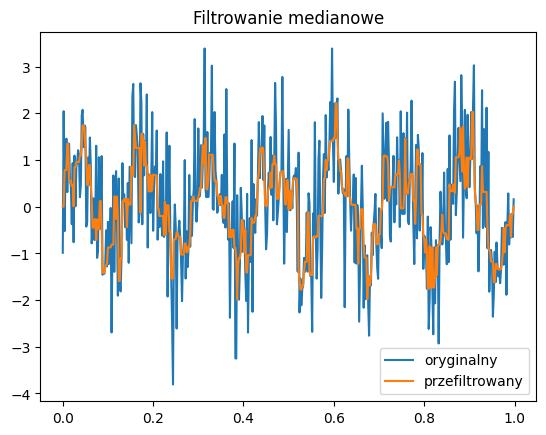

In [12]:
t = np.linspace(0, 1, 500, endpoint=False)
sig = np.sin(2 * np.pi * 7 * t) + np.random.normal(size=500)

filtered = signal.medfilt(sig, kernel_size=5)

plt.plot(t, sig, label="oryginalny")
plt.plot(t, filtered, label="przefiltrowany")
plt.legend()
plt.title("Filtrowanie medianowe")
plt.show()

## Algebra liniowa

In [13]:
# A*x=b
A = np.array([[3, 2], [1, 4]])
b = np.array([6, 5])
x = linalg.solve(A, b)

print("Rozwiązanie układu równań:", x)

Rozwiązanie układu równań: [1.4 0.9]


## Operacje na obrazach

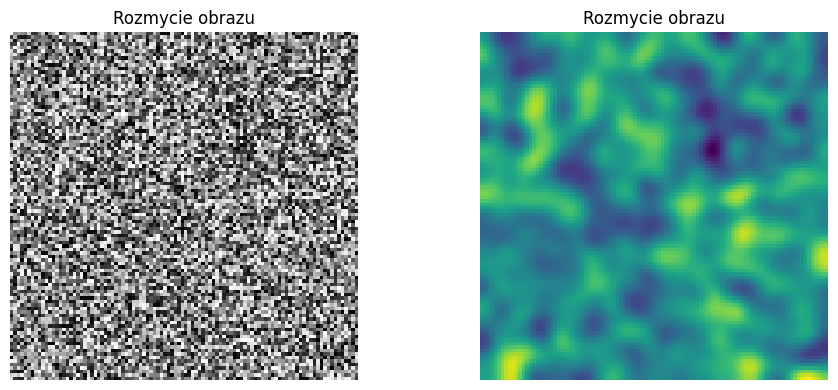

In [18]:
img = np.random.random((100, 100))
blurred = ndimage.gaussian_filter(img, sigma=3)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img, cmap="grey")
axes[0].set_title("Rozmycie obrazu")
axes[0].axis('off')

axes[1].imshow(blurred, cmap="viridis")
axes[1].set_title("Rozmycie obrazu")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Interpolacja

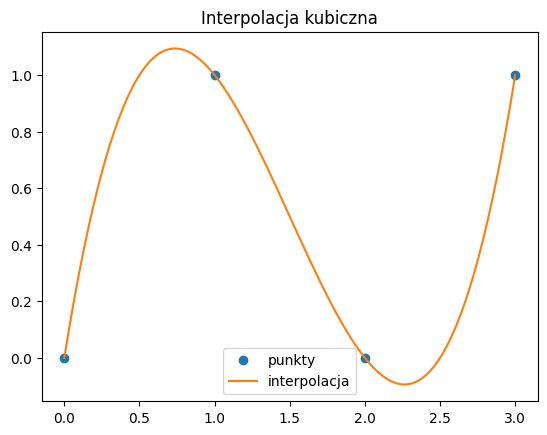

In [19]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 0, 1])

f = interpolate.interp1d(x, y, kind="cubic")

xnew = np.linspace(0, 3, 100)

plt.plot(x, y, "o", label="punkty")
plt.plot(xnew, f(xnew), label='interpolacja')
plt.legend()
plt.title("Interpolacja kubiczna")
plt.show()

## Wykresy

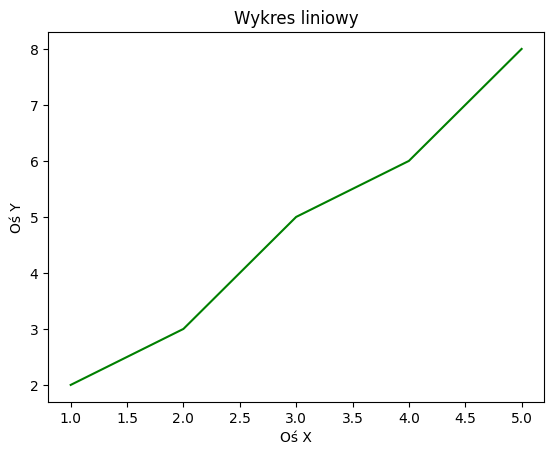

In [21]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 6, 8]

plt.plot(x, y, c="green")
plt.title("Wykres liniowy")
plt.xlabel("Oś X")
plt.ylabel("Oś Y")

plt.show()

## Histogram

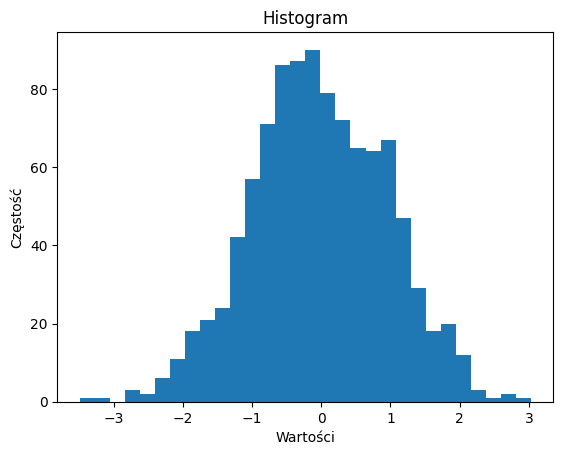

In [24]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(0, 1, 1000)

plt.hist(data, bins=30)
plt.title("Histogram")
plt.xlabel("Wartości")
plt.ylabel("Częstość")

plt.savefig('wykres.png')
plt.savefig('wykres.pdf')
plt.show()


## Wykres ciasteczko

In [27]:
!pip install mpld3
# do plików html


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


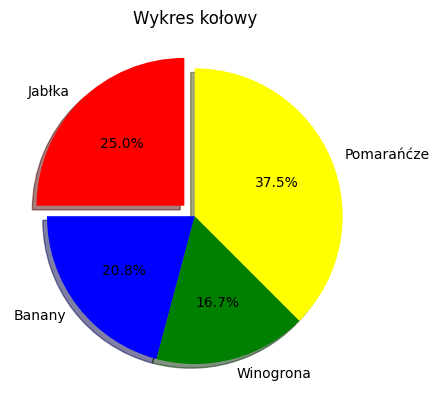

In [34]:
import mpld3

labels = ["Jabłka", "Banany", "Winogrona", "Pomarańćze"]
sizes = [30, 25, 20, 45]
colors = ["red", "blue", "green", "yellow"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True,
        explode=(0.1, 0, 0, 0))

html = mpld3.fig_to_html(plt.gcf())

plt.title("Wykres kołowy")

plt.show()

with open('pie.html', 'w') as f:  # w - oznacza zapis
    f.write(html)

## Wykres słupkowy

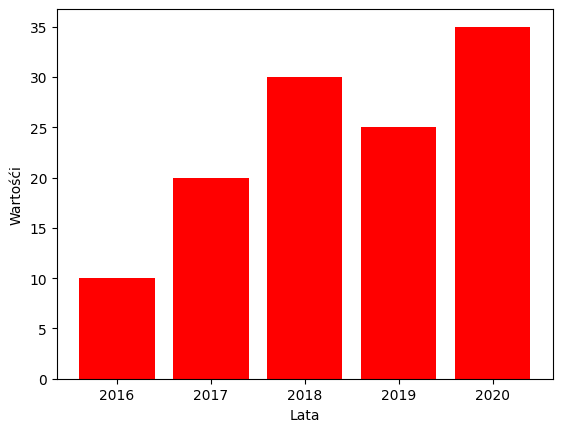

In [35]:
labels = ['2016', '2017', '2018', '2019', '2020']
values = [10, 20, 30, 25, 35]

plt.bar(labels, values, color="red")

plt.xlabel("Lata")
plt.ylabel("Wartośći")

plt.show()

## Wykres wiolinowy

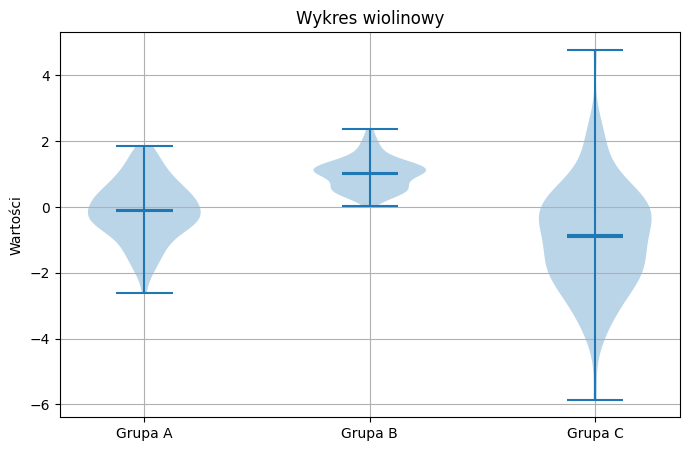

In [37]:
np.random.seed(42)  # zawsze taki sam start

data = [
    np.random.normal(0, 1, 100),
    np.random.normal(1, 0.5, 100),
    np.random.normal(-1, 1.5, 100)
]

plt.figure(figsize=(8, 5))

parts = plt.violinplot(data, showmeans=True, showmedians=True, showextrema=True)

plt.title("Wykres wiolinowy")
plt.xticks([1, 2, 3], ["Grupa A", "Grupa B", "Grupa C"])
plt.ylabel("Wartości")
plt.grid(True)
plt.show()

# Seaborn

In [38]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import seaborn as sns

tips = sns.load_dataset('tips')

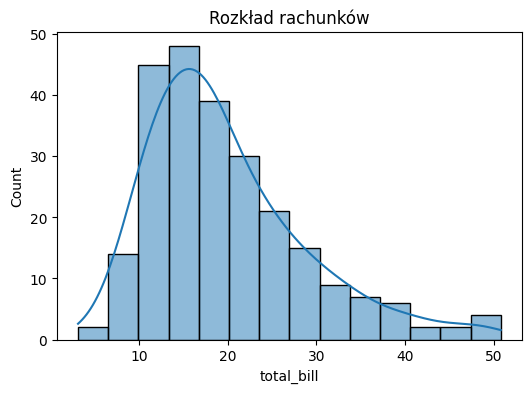

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(data=tips, x="total_bill", kde=True)  # kde - krzywa gęstosci
plt.title("Rozkład rachunków")
plt.show()

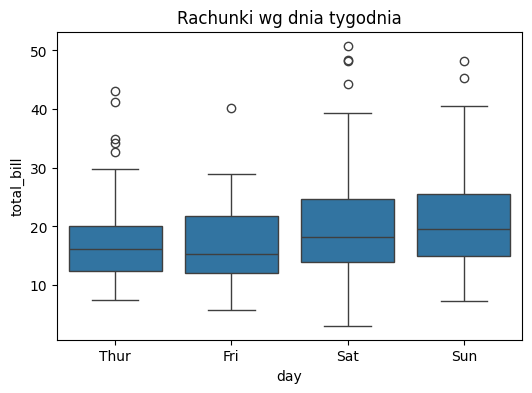

In [42]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=tips, x="day", y="total_bill")
plt.title("Rachunki wg dnia tygodnia")
plt.show()

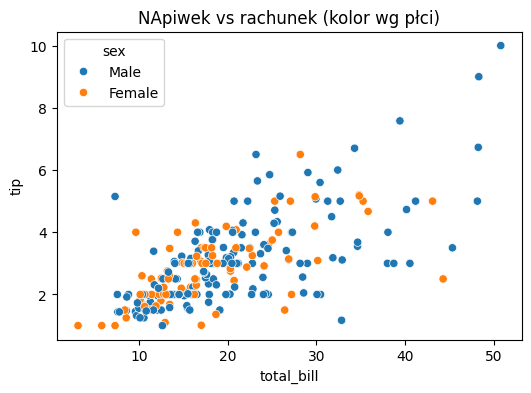

In [43]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
plt.title("NApiwek vs rachunek (kolor wg płci)")
plt.show()

## Użycie regresji

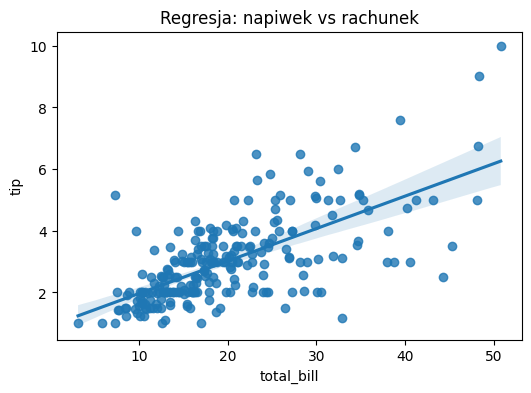

In [45]:
plt.figure(figsize=(6, 4))
sns.regplot(data=tips, x="total_bill", y="tip", scatter=True)
plt.title("Regresja: napiwek vs rachunek")
plt.show()